# Capstone 1: Using Data to Predict Board Game Success

## Part 1: Exploratory Data Analysis (EDA) of the dataset

I have successfully downloaded a wealth of board game data from www.boardgamegeek.com and their API. Now I will use EDA to take a look at the data, clean it up a little, and look for some initial statistics.

First, let's load the data in:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

with open('BGG_DF_Full.pkl', 'rb') as f:
    df_games = pickle.load(f)

In [55]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227196 entries, Die Macher to 100 Folks Around the Old Village
Data columns (total 10 columns):
ID Num            227196 non-null int64
Rating            33294 non-null float64
Standard Dev      227195 non-null float64
Weight            227195 non-null float64
User Number       227195 non-null float64
Min Playtime      97976 non-null float64
Max Playtime      97975 non-null float64
Year Published    97956 non-null float64
Min Players       97977 non-null float64
Max Players       97976 non-null float64
dtypes: float64(9), int64(1)

In [56]:
df_games.head(8)

,ID Num,Rating,Standard Dev,Weight,User Number,Min Playtime,Max Playtime,Year Published,Min Players,Max Players
Die Macher,1,7.24020,1.59272,4.3485,4641,240,240,1986,3,5
Dragonmaster,2,5.84931,1.46524,1.9434,508,30,30,1981,3,4
Samouraï,3,7.26627,1.18381,2.5029,12722,30,60,1998,2,4
Tal der Könige,4,5.74080,1.24525,2.6667,321,60,60,1992,2,4
Acquire,5,7.20394,1.33028,2.5049,16178,90,90,1964,2,6
Mare Mediterraneum,6,5.56609,1.65373,3.0000,76,240,240,1989,2,6
Castle City,7,6.19182,1.31694,1.8075,2884,20,20,1978,2,2
Lords of Creation,8,5.59575,1.25216,2.4000,189,120,120,1993,2,5


So we have the first 250,000 games in their database (some have already been cleaned out if they didn't have the correct entries in the database), with nine features and one target column (the target is the rating). Unfortunately, it appears that only about 33,000 of the games actually have a rating value. Note that the DataFrame's index is the board game name, though there's an ID column to preserve which entry in the database the game is. Since those are the important ones, let's get rid of the rest.

In [2]:
df_games = df_games.dropna(subset=['Rating'])
df_games.info()
df_games.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 33294 entries, Die Macher to Backyard Builders Treehouse
Data columns (total 10 columns):
ID Num            33294 non-null int64
Rating            33294 non-null float64
Standard Dev      33294 non-null float64
Weight            33294 non-null float64
User Number       33294 non-null float64
Min Playtime      20474 non-null float64
Max Playtime      20474 non-null float64
Year Published    20465 non-null float64
Min Players       20474 non-null float64
Max Players       20474 non-null float64
dtypes: float64(9), int64(1)

,ID Num,Rating,Standard Dev,Weight,User Number,Min Playtime,Max Playtime,Year Published,Min Players,Max Players
count,33294.000000,33294.000000,33294.000000,33294.000000,33294.000000,20474.000000,20474.000000,20465.000000,20474.000000,20474.000000
mean,82092.389169,5.872728,1.444354,1.802163,398.604253,69.905148,83.135196,1989.586758,2.005031,5.512308
std,64867.749465,0.480572,0.332784,1.225065,1978.620304,460.142807,514.123107,171.053649,0.703505,14.675239
min,1.000000,2.953680,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31566.000000,5.546780,1.247082,1.000000,19.000000,20.000000,25.000000,2001.000000,2.000000,4.000000
50%,65819.500000,5.693635,1.426220,2.000000,54.000000,45.000000,45.000000,2010.000000,2.000000,4.000000
75%,136145.250000,6.053680,1.626640,2.725375,164.000000,73.750000,90.000000,2014.000000,2.000000,6.000000
max,249414.000000,8.622630,3.990480,5.000000,76405.000000,60000.000000,60000.000000,2019.000000,10.000000,999.000000


In [3]:
with open('BGG_RateClean_DF.pkl', 'wb') as f:
    pickle.dump(df_games, f)

For now, I'll tolerate the fact that there are some NaN values in the dataframe for some of the categories. Let's look at the ones I find most interesting.

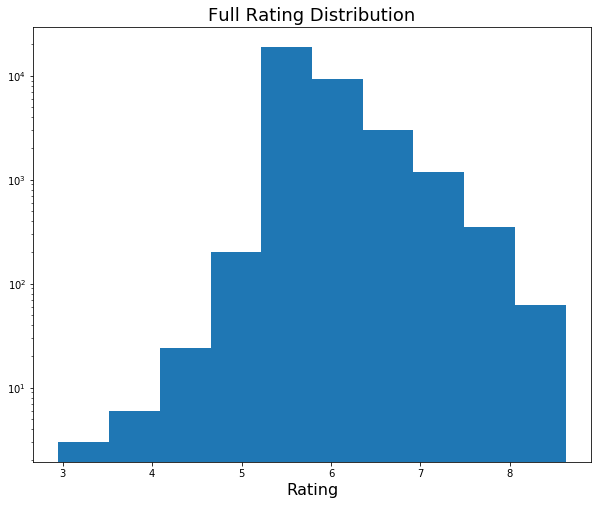

In [94]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(df_games['Rating'], bins=10)
_ = axes.set_xlabel('Rating', fontsize=16)
_ = plt.yscale('log')
_ = plt.title('Full Rating Distribution', fontsize=18)
plt.show()

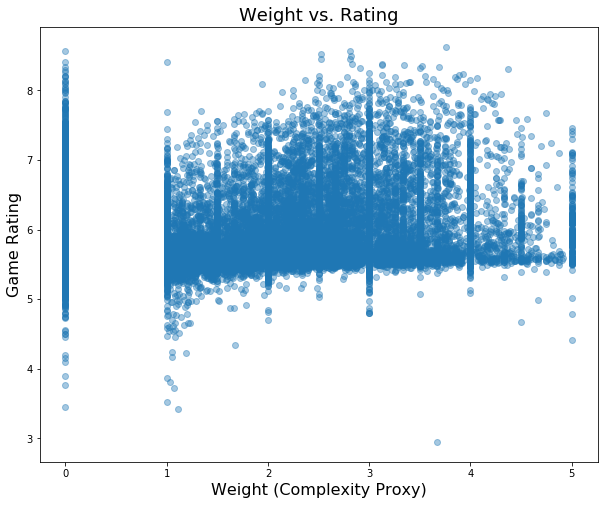

In [65]:
fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(df_games['Weight'], df_games.Rating, alpha=0.4)
_ = axes.set_xlabel('Weight (Complexity Proxy)', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Weight vs. Rating', fontsize=18)
plt.show()

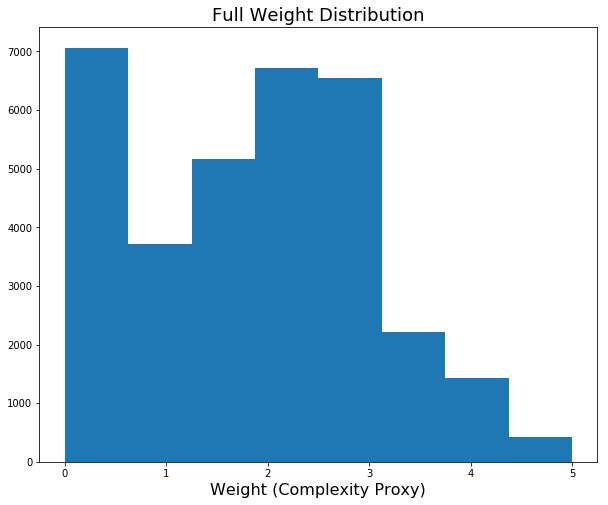

In [90]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.hist(df_games['Weight'], bins=8)
_ = axes.set_xlabel('Weight (Complexity Proxy)', fontsize=16)
_ = plt.title('Full Weight Distribution', fontsize=18)
plt.show()

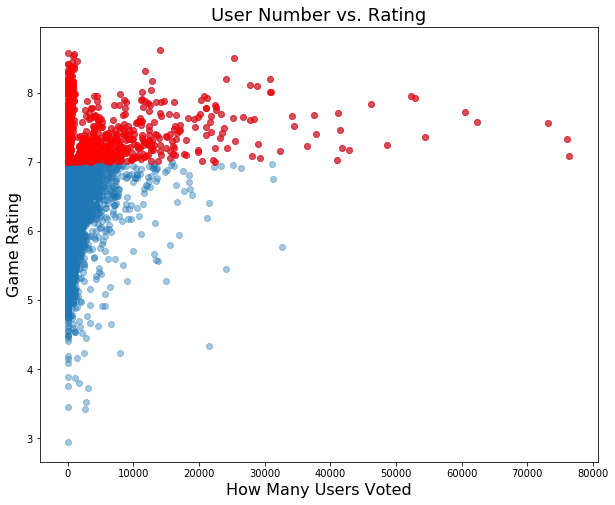

In [63]:
fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
best_games = df_games.loc[df_games.Rating > 7.0]
_ = axes.scatter(df_games['User Number'], df_games.Rating, alpha=0.4)
_ = axes.scatter(best_games['User Number'], best_games.Rating, color='red', alpha=0.6)
_ = axes.set_xlabel('How Many Users Voted', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('User Number vs. Rating', fontsize=18)
plt.show()

Some interesting plots -- one thing worth considering is this: the majority of the games are rated less than 7. But ratings go as high as 8 or above. Are those special? After all, the games with the most votes, seem to *all* have high ratings compared to those with lower user total.

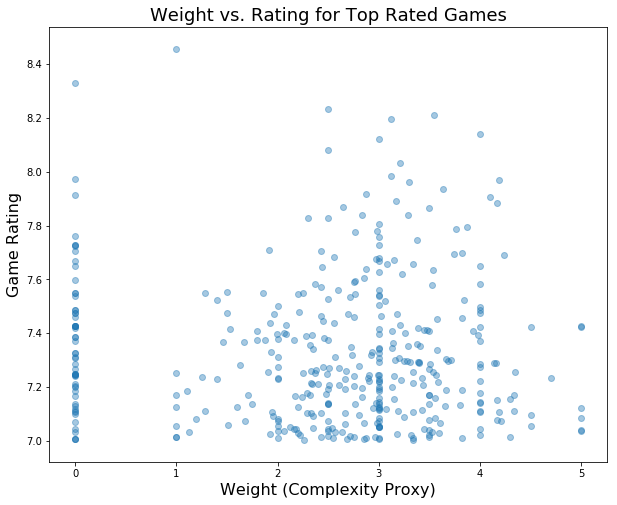

In [62]:
# User Number Weight:
#user_normalize = (best_games['User Number'] / max(best_games['User Number']))

fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(best_games['Weight'], best_games.Rating, yerr=user_normalize, marker='.',
#                  alpha=0.4, linestyle='None', markersize=15)
_ = axes.scatter(best_games['Weight'], best_games.Rating, alpha=0.4)
_ = axes.set_xlabel('Weight (Complexity Proxy)', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Weight vs. Rating for Top Rated Games', fontsize=18)
plt.show()

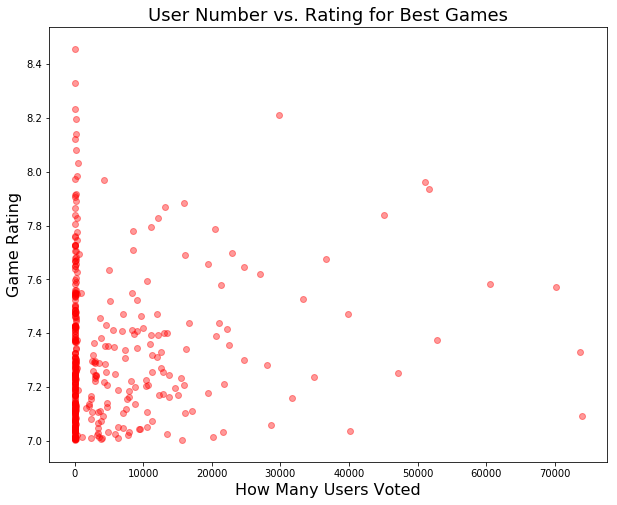

In [61]:
fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(best_games['User Number'], best_games.Rating, color='red', alpha=0.4)
_ = axes.set_xlabel('How Many Users Voted', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('User Number vs. Rating for Best Games', fontsize=18)
plt.show()

There seem to be a lot of games with very few votes compared to those with the most. Let's see what happens if we chop out the smallest ones:

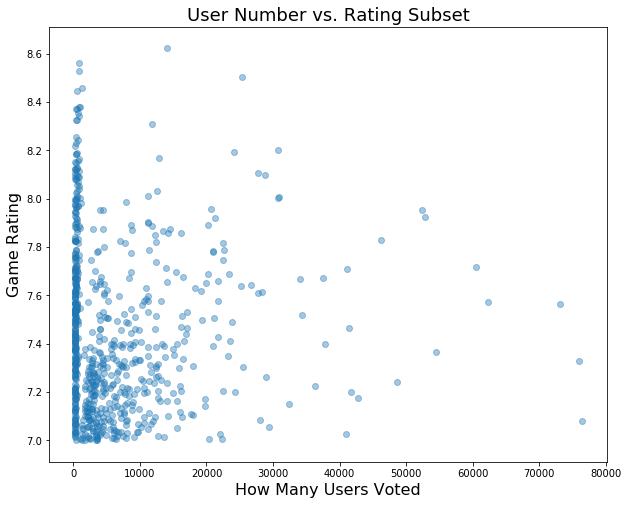

In [68]:
best_subset = best_games.loc[best_games['User Number'] > 180]

fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(best_subset['User Number'], best_subset.Rating, alpha=0.4)
_ = axes.set_xlabel('How Many Users Voted', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('User Number vs. Rating Subset', fontsize=18)
plt.show()

In [69]:
best_subset.info()
best_subset.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, Die Macher to Diablo 2: Lord of Destruction
Data columns (total 10 columns):
ID Num            721 non-null int64
Rating            721 non-null float64
Standard Dev      721 non-null float64
Weight            721 non-null float64
User Number       721 non-null float64
Min Playtime      432 non-null float64
Max Playtime      432 non-null float64
Year Published    431 non-null float64
Min Players       432 non-null float64
Max Players       432 non-null float64
dtypes: float64(9), int64(1)

,ID Num,Rating,Standard Dev,Weight,User Number,Min Playtime,Max Playtime,Year Published,Min Players,Max Players
count,721.000000,721.000000,721.000000,721.000000,721.000000,432.000000,432.000000,431.000000,432.000000,432.000000
mean,89967.533981,7.444884,1.398540,2.841582,6504.006935,75.386574,107.782407,2009.800464,1.909722,4.763889
std,56578.963203,0.340185,0.182964,0.669993,10027.610011,57.704030,86.660786,9.266198,0.630764,1.735341
min,1.000000,7.000330,1.022640,0.000000,181.000000,0.000000,0.000000,1876.000000,1.000000,1.000000
25%,54138.000000,7.173240,1.255150,2.400000,354.000000,30.000000,60.000000,2008.000000,2.000000,4.000000
50%,72416.000000,7.373600,1.395800,2.829300,2888.000000,60.000000,90.000000,2012.000000,2.000000,5.000000
75%,132959.000000,7.651820,1.515550,3.263200,8504.000000,90.000000,120.000000,2015.000000,2.000000,5.000000
max,245334.000000,8.622630,2.189960,4.702000,76405.000000,480.000000,1000.000000,2018.000000,5.000000,18.000000


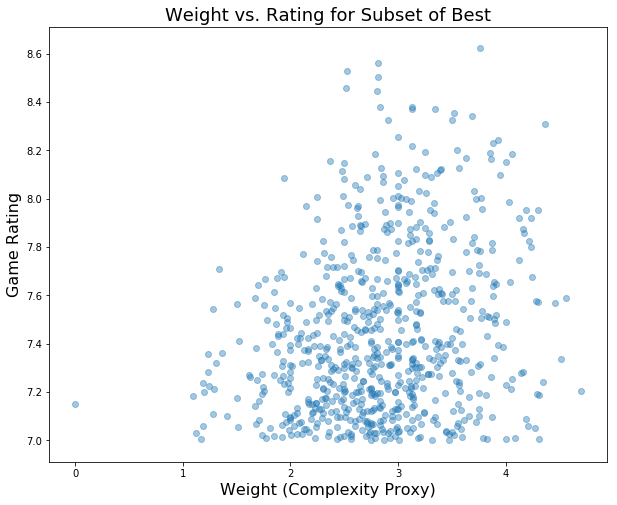

In [71]:
fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(best_games['Weight'], best_games.Rating, yerr=user_normalize, marker='.',
#                  alpha=0.4, linestyle='None', markersize=15)
_ = axes.scatter(best_subset['Weight'], best_subset.Rating, alpha=0.4)
_ = axes.set_xlabel('Weight (Complexity Proxy)', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Weight vs. Rating for Subset of Best', fontsize=18)
plt.show()

This subset is for the top 721 rated games. Let's visualize these games more:

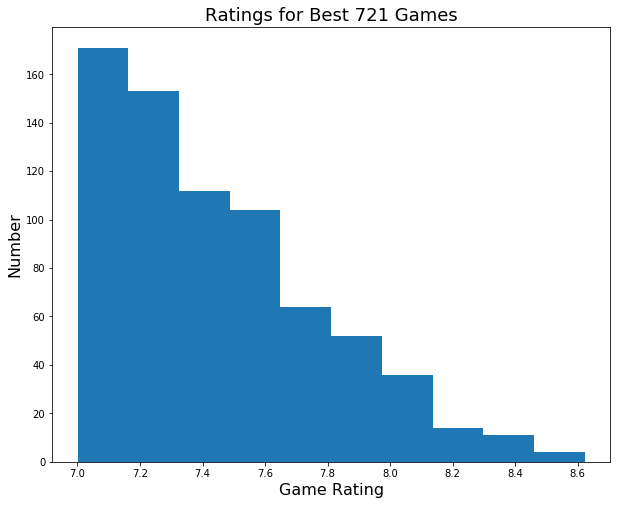

In [72]:
fig, axes = plt.subplots(figsize=(10, 8))
_ = axes.hist(best_subset.Rating, bins=10)
_ = axes.set_xlabel('Game Rating', fontsize=16)
_ = axes.set_ylabel('Number', fontsize=16)
_ = plt.title('Ratings for Best 721 Games', fontsize=18)
plt.show()

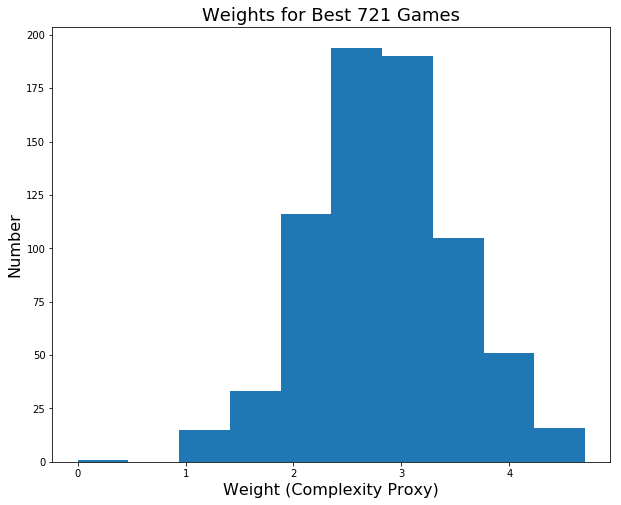

In [73]:
fig, axes = plt.subplots(figsize=(10, 8))
_ = axes.hist(best_subset.Weight, bins=10)
_ = axes.set_xlabel('Weight (Complexity Proxy)', fontsize=16)
_ = axes.set_ylabel('Number', fontsize=16)
_ = plt.title('Weights for Best 721 Games', fontsize=18)
plt.show()

What about the other categories like year published? Well there are some values in there that don't make sense. Let's try to clean up and then make sense of it:

In [5]:
df_games_noNull = df_games.dropna()
df_games_yr_clean = df_games_noNull.loc[df_games_noNull['Year Published'] > 1900]
df_games_yr_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20231 entries, Die Macher to Backyard Builders Treehouse
Data columns (total 10 columns):
ID Num            20231 non-null int64
Rating            20231 non-null float64
Standard Dev      20231 non-null float64
Weight            20231 non-null float64
User Number       20231 non-null float64
Min Playtime      20231 non-null float64
Max Playtime      20231 non-null float64
Year Published    20231 non-null float64
Min Players       20231 non-null float64
Max Players       20231 non-null float64
dtypes: float64(9), int64(1)

In [9]:
df_games_yr_maxplay_clean = df_games_yr_clean.loc[df_games_yr_clean['Max Players'] < 21]

with open('BGG_NoNaN_DF.pkl', 'wb') as f:
    pickle.dump(df_games_yr_maxplay_clean, f)

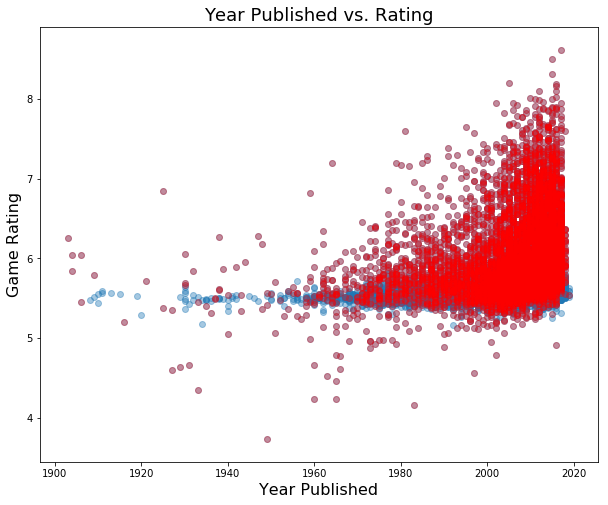

In [75]:
subset_yr_clean = df_games_yr_clean.loc[df_games_yr_clean['User Number'] > 180]

fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(df_games_yr_clean['Year Published'], df_games_yr_clean.Rating, alpha=0.4)
_ = axes.scatter(subset_yr_clean['Year Published'], subset_yr_clean.Rating, alpha=0.3, color='red')
_ = axes.set_xlabel('Year Published', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Year Published vs. Rating', fontsize=18)
plt.show()

Interesting. It seems like there are few games with high ratings that came out in the earlier part of the 20th century! Let's zoom in:

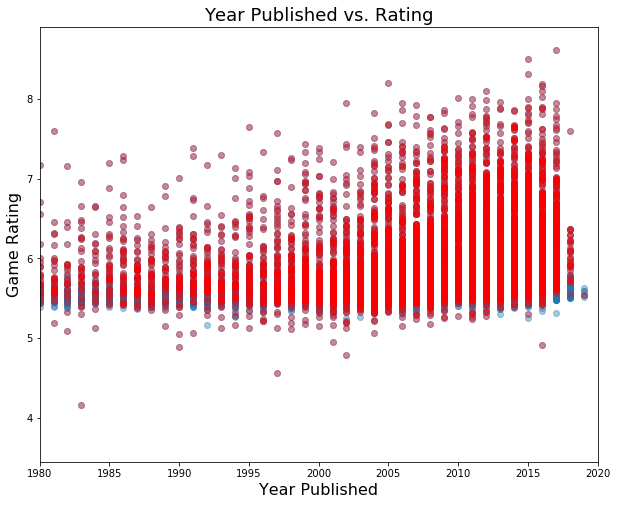

In [76]:
fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(df_games_yr_clean['Year Published'], df_games_yr_clean.Rating, alpha=0.4)
_ = axes.scatter(subset_yr_clean['Year Published'], subset_yr_clean.Rating, alpha=0.3, color='red')
_ = axes.set_xlabel('Year Published', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.xlim([1980, 2020])
_ = plt.title('Year Published vs. Rating', fontsize=18)
plt.show()

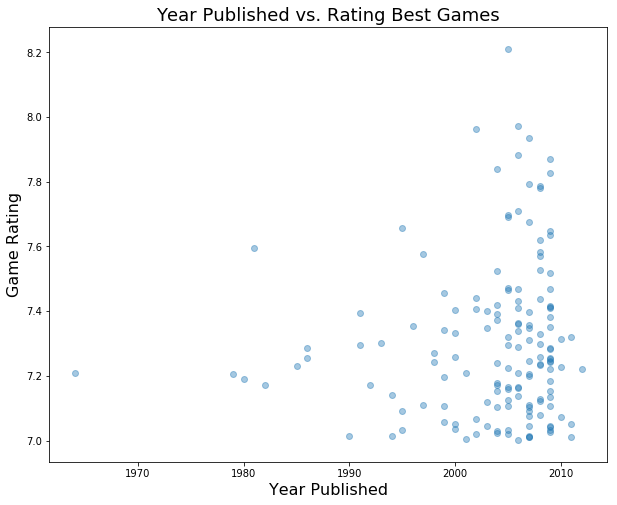

In [53]:
best_subset_yr_clean = subset_yr_clean.loc[subset_yr_clean.Rating > 7.0]

fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(best_subset_yr_clean['Year Published'], best_subset_yr_clean.Rating, alpha=0.4)
_ = axes.set_xlabel('Year Published', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Year Published vs. Rating Best Games', fontsize=18)
plt.show()

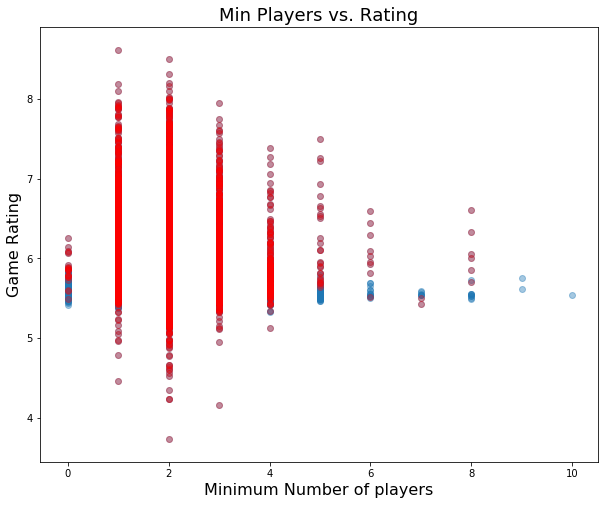

In [79]:
fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(df_games_yr_clean['Min Players'], df_games_yr_clean.Rating, alpha=0.4)
_ = axes.scatter(subset_yr_clean['Min Players'], subset_yr_clean.Rating, alpha=0.3, color='red')
_ = axes.set_xlabel('Minimum Number of players', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Min Players vs. Rating', fontsize=18)
plt.show()

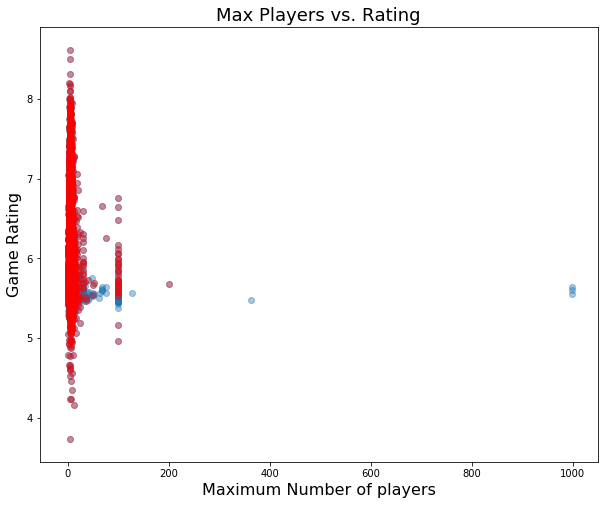

In [80]:
fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(df_games_yr_clean['Max Players'], df_games_yr_clean.Rating, alpha=0.4)
_ = axes.scatter(subset_yr_clean['Max Players'], subset_yr_clean.Rating, alpha=0.3, color='red')
_ = axes.set_xlabel('Maximum Number of players', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Max Players vs. Rating', fontsize=18)
plt.show()

Hmmm...let's get rid of some of these outliers for now:

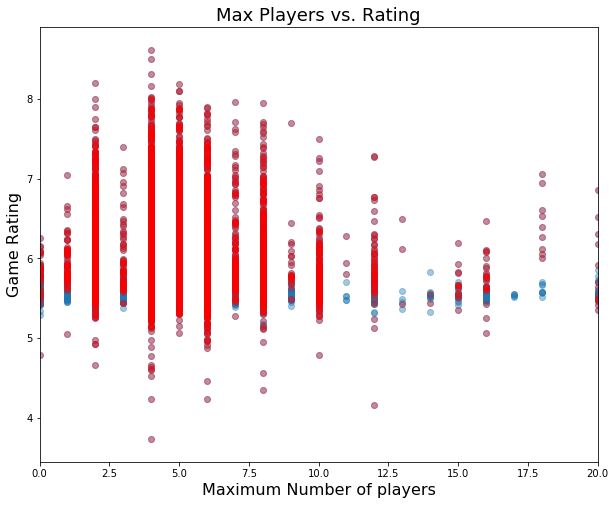

In [85]:
fig, axes = plt.subplots(figsize=(10,8))
#_ = axes.errorbar(df_games['Weight'], df_games.Rating, yerr=df_games['Standard Dev'], marker='.',
#                  alpha=0.4, linestyle='None')
_ = axes.scatter(df_games_yr_clean['Max Players'], df_games_yr_clean.Rating, alpha=0.4)
_ = axes.scatter(subset_yr_clean['Max Players'], subset_yr_clean.Rating, alpha=0.3, color='red')
_ = axes.set_xlabel('Maximum Number of players', fontsize=16)
_ = axes.set_ylabel('Game Rating', fontsize=16)
_ = plt.title('Max Players vs. Rating', fontsize=18)
_ = plt.xlim([0, 20])
plt.show()